Surname & Initial: Ngcobo A
Student number : 22338343

Loading a Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load Dataset

In [ ]:
#  Load datasets
print("=== Step 1: Load Datasets ===")
patients = pd.read_csv('/content/drive/MyDrive/Hospital Dataset/patients.csv')
billing = pd.read_csv('/content/drive/MyDrive/Hospital Dataset/billing.csv')

print("Patients columns:", patients.columns.tolist())
print("Billing columns:", billing.columns.tolist())

=== Step 1: Load Datasets ===
Patients columns: ['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email']
Billing columns: ['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status']


data cleaning end exploration

In [ ]:
# Step 2: Data Cleaning and Exploration
print("\n=== Step 2: Data Cleaning and Exploration ===")

# Show initial data types
print("\nData types of patients dataframe:")
print(patients.dtypes)


=== Step 2: Data Cleaning and Exploration ===

Data types of patients dataframe:
patient_id            object
first_name            object
last_name             object
gender                object
date_of_birth         object
contact_number         int64
address               object
registration_date     object
insurance_provider    object
insurance_number      object
email                 object
dtype: object


In [ ]:
#Check for duplicates
num_duplicates = patients.duplicated().sum()
print(f"\nNumber of duplicate rows in patients data: {num_duplicates}")
if num_duplicates > 0:
    patients = patients.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates to remove.")


Number of duplicate rows in patients data: 0
No duplicates to remove.


In [ ]:
# Check for missing values
missing_values = patients.isnull().sum()
print("\nMissing values per column in patients data:")
print(missing_values)


Missing values per column in patients data:
patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64


In [ ]:
#  Create Target Variable "prescribed" =====
print("\n=== Step 3: Create Target Variable 'prescribed' ===")

billed_patient_ids = billing['patient_id'].unique()
patients['prescribed'] = patients['patient_id'].apply(lambda x: 1 if x in billed_patient_ids else 0)

print("Counts of 'prescribed' classes:")
print(patients['prescribed'].value_counts())


=== Step 3: Create Target Variable 'prescribed' ===
Counts of 'prescribed' classes:
prescribed
1    48
0     2
Name: count, dtype: int64


calculate age from date of birth

In [ ]:
# Step 2: Calculate age from date_of_birth
def calculate_age(birthdate):
    birthdate = pd.to_datetime(birthdate, errors='coerce')
    today = pd.to_datetime('today')
    if pd.isna(birthdate):
        return None
    return (today - birthdate).days // 365

patients['age'] = patients['date_of_birth'].apply(calculate_age)


In [ ]:
# Drop rows with missing age
patients = patients.dropna(subset=['age'])



Age column stats:
count    50.000000
mean     44.660000
std      16.069505
min      20.000000
25%      32.000000
50%      44.000000
75%      57.750000
max      75.000000
Name: age, dtype: float64

Counts of prescribed patients:
prescribed
1    48
0     2
Name: count, dtype: int64


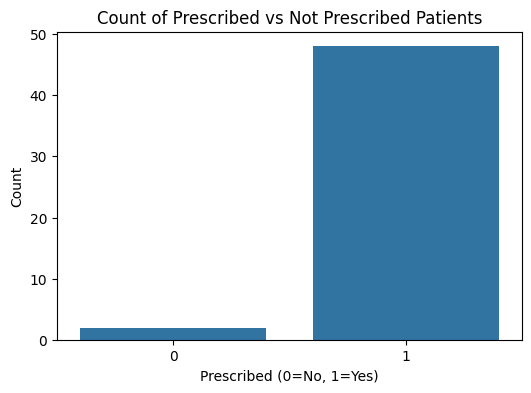


Mean age by prescribed status:
   prescribed        age
0           0  61.500000
1           1  43.958333


In [ ]:

# Show age statistics
print("\nAge column stats:")
print(patients['age'].describe())

# Show counts of prescribed patients
print("\nCounts of prescribed patients:")
print(patients['prescribed'].value_counts())

# Step 3: EDA - plot counts of prescribed vs not prescribed
plt.figure(figsize=(6,4))
sns.countplot(x='prescribed', data=patients)
plt.title('Count of Prescribed vs Not Prescribed Patients')
plt.xlabel('Prescribed (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


# Step 5: Calculate and print mean age by prescription status
age_means = patients.groupby('prescribed')['age'].mean().reset_index()
print("\nMean age by prescribed status:")
print(age_means)



In [ ]:
# Calculate and print mean age by prescription status
age_means = patients.groupby('prescribed')['age'].mean().reset_index()
print("\nMean age by prescribed status:")
print(age_means)


Mean age by prescribed status:
   prescribed        age
0           0  61.500000
1           1  43.958333


In [ ]:
# Prepare Features and Target =====
print("\n=== Step 5: Prepare Features and Target ===")

features = patients[['age', 'gender']]
target = patients['prescribed']

features_encoded = pd.get_dummies(features, columns=['gender'], drop_first=True)
print("Sample of one-hot encoded features:")
print(features_encoded.head())


=== Step 5: Prepare Features and Target ===
Sample of one-hot encoded features:
   age  gender_M
0   70     False
1   40     False
2   47      True
3   44     False
4   65      True


Quick overView

In [ ]:
# Quick overview
print("Patients shape:", patients.shape)
print("Billing shape:", billing.shape)
print("Patients columns:", patients.columns.tolist())
print("Billing columns:", billing.columns.tolist())



Patients shape: (50, 13)
Billing shape: (200, 7)
Patients columns: ['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email', 'prescribed', 'age']
Billing columns: ['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status']


Creating target prescribed

In [ ]:

# Create target 'prescribed': 1 if patient has billing record, else 0
billed_patient_ids = billing['patient_id'].unique()
patients['prescribed'] = patients['patient_id'].apply(lambda x: 1 if x in billed_patient_ids else 0)

print("Sample of patients with 'prescribed' column:")
print(patients[['patient_id', 'prescribed']].head())

Sample of patients with 'prescribed' column:
  patient_id  prescribed
0       P001           1
1       P002           1
2       P003           1
3       P004           1
4       P005           1


Checking if Column Age esxists

In [ ]:
# Check if 'age' column exists; if not, create it from 'date_of_birth'
if 'age' not in patients.columns:
    if 'date_of_birth' in patients.columns:
        from datetime import datetime
        today = pd.to_datetime('today')
        patients['date_of_birth'] = pd.to_datetime(patients['date_of_birth'], errors='coerce')
        patients['age'] = (today - patients['date_of_birth']).dt.days // 365
        print("Created 'age' column from 'date_of_birth'.")
    else:
        print("No 'age' or 'date_of_birth' column found; cannot create 'age'.")
        # To avoid empty features, create a dummy age column (or stop)
        patients['age'] = 0

print("Check patients with valid age and gender:")
print(patients[['age', 'gender']].dropna().head())

Check patients with valid age and gender:
   age gender
0   70      F
1   40      F
2   47      M
3   44      F
4   65      M


In [ ]:


# Remove rows with missing age or gender to avoid issues
patients = patients.dropna(subset=['age', 'gender', 'prescribed'])

# Prepare features and target
features = patients[['age', 'gender']]
target = patients['prescribed']

# One-hot encode gender
features_encoded = pd.get_dummies(features, columns=['gender'], drop_first=True)

print("Features shape:", features_encoded.shape)
print("Target shape:", target.shape)

if len(features_encoded) == 0:
    raise ValueError("No data available for training after preprocessing!")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features_encoded, target, test_size=0.3, random_state=42
)

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)




Features shape: (50, 2)
Target shape: (50,)


LogisticRegression(max_iter=1000)

Train Random Forest and Logistic Reggression Accurancy

In [ ]:
 #Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 0.9333333333333333
